# Performance Python

In [1]:
def perf_comp_data(func_list, data_list, rep=3, number=1):
    from timeit import repeat
    res_list = {}
    for name in enumerate(func_list):
        stmt = name[1] + '(' + data_list[name[0]] + ')'
        setup = "from __main__ import " + name[1] + ', ' + data_list[name[0]]
        results = repeat(stmt=stmt, setup=setup, repeat=rep, number=number)
        res_list[name[1]] = sum(results) / rep
    res_sort = sorted(res_list.items(), key=lambda p: (lambda k, v: (v, k))(*p))
    for item in res_sort:
        rel = item[1] / res_sort[0][1]
        print('function: ' + item[0] + ', avg. time sec: %9.5f, ' % item[1] + 'relative: %6.1f' % rel)

## Python Paradigms and Performance

In [2]:
from math import *
def f(x):
    return abs(cos(x)) ** 0.5 + sin(2 + 3 * x)

In [3]:
I = 500000
a_py = range(I)

In [4]:
def f1(a):
    res = []
    for x in a:
        res.append(f(x))
    return res

def f2(a):
    return [f(x) for x in a]

In [5]:
def f3(a):
    ex = '(abs(cos(x))) ** 0.5 + sin(2 + 3 * x)'
    return [eval(ex) for x in a]

In [6]:
import numpy as np
a_np = np.arange(I)

def f4(a):
    return (np.sqrt(np.abs(np.cos(a))) + np.sin(2 + 3 * a))

In [7]:
import numexpr as ne

def f5(a):
    ex = 'abs(cos(a)) ** 0.5 + sin(2 + 3 * a)'
    ne.set_num_threads(1)
    return ne.evaluate(ex)

def f6(a):
    ex = 'abs(cos(a)) ** 0.5 + sin(2 + 3 * a)'
    ne.set_num_threads(16)
    return ne.evaluate(ex)

In [8]:
%%time
r1 = f1(a_py)
r2 = f2(a_py)
r3 = f3(a_py)
r4 = f4(a_np)
r5 = f5(a_np)
r6 = f6(a_np)

CPU times: user 14.4 s, sys: 112 ms, total: 14.5 s
Wall time: 14.6 s


In [9]:
for r in [r1, r2, r3, r4, r5, r6]:
    print(np.allclose(r1, r))

True
True
True
True
True
True


In [10]:
func_list = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
data_list = ['a_py', 'a_py', 'a_py', 'a_np', 'a_np', 'a_np']

In [11]:
perf_comp_data(func_list, data_list)

function: f6, avg. time sec:   0.01099, relative:    1.0
function: f5, avg. time sec:   0.02466, relative:    2.2
function: f4, avg. time sec:   0.02557, relative:    2.3
function: f2, avg. time sec:   0.38515, relative:   35.0
function: f1, avg. time sec:   0.43862, relative:   39.9
function: f3, avg. time sec:  12.51202, relative: 1138.6


## Memory Layout and Performance

In [12]:
import numpy as np

In [13]:
np.zeros((3, 3), dtype=np.float64, order='C')

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [14]:
# 1s, 2s, and 3s are stored together
c = np.array([[1., 1., 1.],
             [2., 2., 2.],
             [3., 3., 3.]], order='C')

In [15]:
# 1, 2, and 3 are stored together in each column
f = np.array([[1., 1., 1.],
             [2., 2., 2.],
             [3., 3., 3.]], order='F')

In [16]:
x = np.random.standard_normal((3, 1500000))
C = np.array(x, order='C')
F = np.array(x, order='F')
x = 0.0

In [17]:
%timeit C.sum(axis=0)

10 ms ± 72.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%timeit C.sum(axis=1)

2.54 ms ± 28.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%timeit C.std(axis=0)

51.1 ms ± 709 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [20]:
%timeit C.std(axis=1)

22.5 ms ± 214 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
%timeit F.sum(axis=0)

32 ms ± 2.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
%timeit F.sum(axis=1)

34.4 ms ± 3.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%timeit F.std(axis=0)

98.4 ms ± 4.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
%timeit F.std(axis=1)

91.3 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
C = 0.0
F = 0.0

## Parallel Computing

In [26]:
def bsm_mcs_valuation(K):
    import numpy as np
    
    S0 = 100.; T = 1.; r = 0.05; vol = 0.2
    M = 50; I = 20000; dt = T / M
    
    rand = np.random.standard_normal((M + 1, I))
    S = np.zeros((M + 1, I)); S[0] = S0
    
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - vol ** 2 / 2) * dt + vol * np.sqrt(dt) * rand[t])
    
    value = np.exp(-r * T) * np.sum(np.maximum(S[-1] - K, 0)) / I
    
    return value

In [27]:
def seq_value(n):
    _K = np.linspace(80, 120, n)
    _C = []
    for K in _K:
        _C.append(bsm_mcs_valuation(K))
    return _K, _C

In [28]:
n = 100
%time _K, _C_seq = seq_value(n)

CPU times: user 5.59 s, sys: 284 ms, total: 5.88 s
Wall time: 5.9 s


Text(0,0.5,'European call option values')

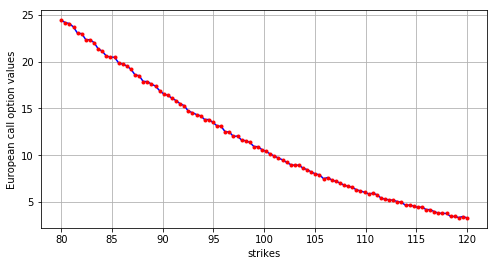

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 4))
plt.plot(_K, _C_seq, 'b')
plt.plot(_K, _C_seq, 'r.')
plt.grid(True)
plt.xlabel('strikes')
plt.ylabel('European call option values')

In [30]:
from ipyparallel import Client
c = Client()
view = c.load_balanced_view()

In [31]:
def par_value(n):
    _K = np.linspace(80, 120, n)
    _C = []
    for K in _K:
        value = view.apply_async(bsm_mcs_valuation, K)
        _C.append(value)
    c.wait(_C)
    return _K, _C

In [32]:
%time _K, _C_obj = par_value(n)

CPU times: user 635 ms, sys: 42.3 ms, total: 677 ms
Wall time: 4.06 s


In [33]:
_C_par = []
for res in _C_obj:
    _C_par.append(res.result())

Text(0,0.5,'European call option value')

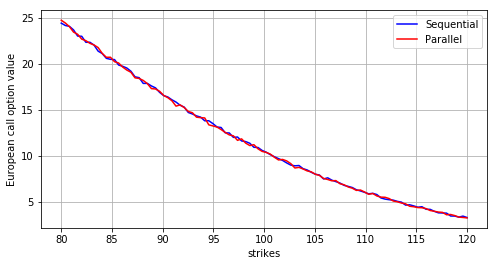

In [34]:
plt.figure(figsize=(8, 4))
plt.plot(_K, _C_seq, 'b', label='Sequential')
plt.plot(_K, _C_par, 'r', label='Parallel')
plt.grid(True); plt.legend(loc=0)
plt.xlabel('strikes')
plt.ylabel('European call option value')

In [35]:
n = 50
func_list = ['seq_value', 'par_value']
data_list = 2 * ['n']

In [36]:
perf_comp_data(func_list, data_list)

function: par_value, avg. time sec:   1.56713, relative:    1.0
function: seq_value, avg. time sec:   2.88546, relative:    1.8


## Multiprocessing

In [37]:
import multiprocessing as mp

def simulate_geometric_brownian_motion(p):
    M, I = p
    S0 = 100; r = 0.05; sigma = 0.2; T = 1.0
    dt = T / M
    paths = np.zeros((M + 1, I))
    paths[0] = S0
    for t in range(1, M + 1):
        paths[t] = paths[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * np.random.standard_normal(I))
    return paths

In [38]:
paths = simulate_geometric_brownian_motion((5, 2))
paths

array([[100.        , 100.        ],
       [ 97.14535647,  90.80871116],
       [109.54472492,  81.99225849],
       [110.01923771,  76.4871586 ],
       [109.53649804,  76.07636345],
       [117.27741571,  80.88473787]])

In [39]:
I = 10000
M = 100
t = 100

In [40]:
from time import time
times = []
for w in range(1,5):
    t0 = time()
    pool = mp.Pool(processes=w)
    result = pool.map(simulate_geometric_brownian_motion, t * [(M, I), ])
    times.append(time() - t0)

Text(0.5,1,'100 Monte Carlo simulations')

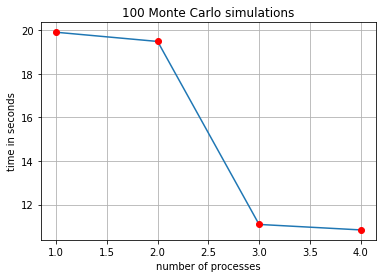

In [41]:
plt.plot(range(1,5), times)
plt.plot(range(1,5), times, 'ro')
plt.grid(True)
plt.xlabel('number of processes')
plt.ylabel('time in seconds')
plt.title('%d Monte Carlo simulations' % t)

## Dynamic Compiling

In [42]:
from math import cos, log
def f_py(I, J):
    res = 0
    for i in range(I):
        for j in range(J):
            res += int(cos(log(1)))
    return res

In [43]:
I, J = 5000, 5000
%time f_py(I, J)

CPU times: user 16 s, sys: 106 ms, total: 16.1 s
Wall time: 16.1 s


25000000

In [44]:
def f_np(I, J):
    a = np.ones((I, J), dtype=np.float64)
    return int(np.sum(np.cos(np.log(a)))), a

In [45]:
%time res, a = f_np(I, J)

CPU times: user 718 ms, sys: 377 ms, total: 1.09 s
Wall time: 1.24 s


In [46]:
# Note that the numpy method is not memory efficient
# When I and J are chosen large enough, this method fails
a.nbytes

200000000

In [47]:
import numba as nb

In [48]:
f_nb = nb.jit(f_py)

In [49]:
%time f_nb(I, J)

CPU times: user 238 ms, sys: 136 ms, total: 373 ms
Wall time: 681 ms


25000000

In [50]:
func_list = ['f_py', 'f_np', 'f_nb']
data_list = 3 * ['I, J']

In [51]:
perf_comp_data(func_list, data_list)

function: f_nb, avg. time sec:   0.00003, relative:    1.0
function: f_np, avg. time sec:   0.90919, relative: 31136.7
function: f_py, avg. time sec:  15.97525, relative: 547097.7


## Binomial Option Pricing

In [52]:
import numpy as np

S0 =100.
T = 1.
r = 0.05
vol = 0.2

M = 1000
dt = T / M
df = np.exp(-r * dt)

u = np.exp(vol * np.sqrt(dt))
d = 1 / u
q = (np.exp(r * dt) - d) / (u - d)

In [53]:
def binomial_py(strike):
    S = np.zeros((M + 1, M + 1), dtype=np.float64)
    S[0, 0] = S0
    z1 = 0
    for j in range(1, M + 1, 1):
        z1 = z1 + 1
        for i in range(z1 + 1):
            S[i, j] = S[0, 0] * u ** j * d ** (i * 2)
    
    iv = np.zeros((M + 1, M + 1), dtype=np.float64)
    z2 = 0
    for j in range(0, M + 1, 1):
        for i in range(z2 + 1):
            iv[i, j] = max(S[i, j] - strike, 0)
        z2 = z2 + 1
    
    pv = np.zeros((M + 1, M + 1), dtype=np.float64)
    pv[:, M] = iv[:, M]
    z3 = M + 1
    for j in range(M - 1, -1, -1):
        z3 = z3 - 1
        for i in range(z3):
            pv[i, j] = df * (q * pv[i, j + 1] + (1 - q) * pv[i + 1, j + 1])
    
    return pv[0,0]

In [54]:
%time round(binomial_py(100), 3)

CPU times: user 2.23 s, sys: 28.9 ms, total: 2.26 s
Wall time: 2.26 s


10.449

In [55]:
%time round(bsm_mcs_valuation(100), 3)

CPU times: user 66.8 ms, sys: 10.2 ms, total: 77 ms
Wall time: 74.5 ms


10.331

In [56]:
def binomial_np(strike):
    mu = np.arange(M + 1)
    mu = np.resize(mu, (M + 1, M + 1))
    md = np.transpose(mu)
    mu = u ** (mu - md)
    md = d ** md
    S = S0 * mu * md
    
    pv = np.maximum(S - strike, 0)
    z = 0
    for t in range(M - 1, -1, -1):
        pv[0 : M - z, t] = df * (q * pv[0 : M - z, t + 1] + (1 - q) * pv[1 : M - z + 1, t + 1])
        z = z + 1
    
    return pv[0,0]

In [57]:
M = 1000
%time round(binomial_np(100), 3)

CPU times: user 155 ms, sys: 14.6 ms, total: 169 ms
Wall time: 171 ms


10.449

In [58]:
binomial_nb = nb.jit(binomial_py)

In [59]:
%time round(binomial_nb(100), 3)

CPU times: user 556 ms, sys: 52.7 ms, total: 609 ms
Wall time: 640 ms


10.449

In [60]:
func_list = ['binomial_py', 'binomial_np', 'binomial_nb']
K = 100.
data_list = 3 * ['K']

In [61]:
perf_comp_data(func_list, data_list)

function: binomial_np, avg. time sec:   0.14720, relative:    1.0
function: binomial_nb, avg. time sec:   0.16169, relative:    1.1
function: binomial_py, avg. time sec:   2.24836, relative:   15.3


## Static Compiling with Cython

In [62]:
def f_py(I, J):
    res = 0.
    for i in range(I):
        for j in range(I * J):
            res += 1
    return res

In [63]:
I , J = 500, 500
%time f_py(I, J)

CPU times: user 11.1 s, sys: 65.7 ms, total: 11.1 s
Wall time: 11.1 s


125000000.0

In [64]:
import pyximport
pyximport.install()

(None, <pyximport.pyximport.PyxImporter at 0x11de70fd0>)

In [65]:
from nested_loop import f_cy

In [66]:
%time res = f_cy(I, J)

CPU times: user 130 ms, sys: 2.46 ms, total: 132 ms
Wall time: 131 ms


In [67]:
res

125000000.0

In [68]:
f_nb = nb.jit(f_py)
%time res = f_nb(I, J)

CPU times: user 220 ms, sys: 4.63 ms, total: 225 ms
Wall time: 223 ms


In [69]:
res

125000000.0

In [70]:
func_list = ['f_py', 'f_cy', 'f_nb']
I, J = 500, 500
data_list = 3 * ['I, J']

In [71]:
perf_comp_data(func_list, data_list)

function: f_cy, avg. time sec:   0.12420, relative:    1.0
function: f_nb, avg. time sec:   0.13016, relative:    1.0
function: f_py, avg. time sec:  11.68681, relative:   94.1
